<a href="https://colab.research.google.com/github/GuerrillaGambit/Salary-Prediction/blob/main/Decision_tree_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("/content/Salary_Data.csv")

In [3]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


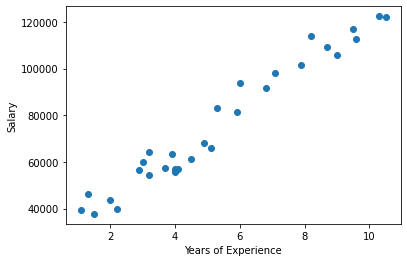

In [4]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3, random_state = 101)

In [10]:
X_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [11]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [12]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [13]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

##Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
DT=DecisionTreeRegressor()

In [16]:
DT.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
y_pred_dt=DT.predict(X_test)

In [18]:
y_pred_dt

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [19]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [20]:
diff_DT=y_test-y_pred_dt

In [21]:
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [22]:
res_dt

,Prediction,Original Data,Diff
0,98273.0,91738.0,-6535.0
1,113812.0,109431.0,-4381.0
2,64445.0,54445.0,-10000.0
3,93940.0,81363.0,-12577.0
4,46205.0,37731.0,-8474.0
5,121872.0,112635.0,-9237.0
6,121872.0,116969.0,-4903.0
7,67938.0,66029.0,-1909.0
8,113812.0,105582.0,-8230.0
9,121872.0,122391.0,519.0


In [23]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))
R2=metrics.r2_score(y_test,y_pred_dt)

In [24]:
rmse

7568.996703658947

In [26]:
R2

0.9241934760377903

In [27]:
from sklearn import tree

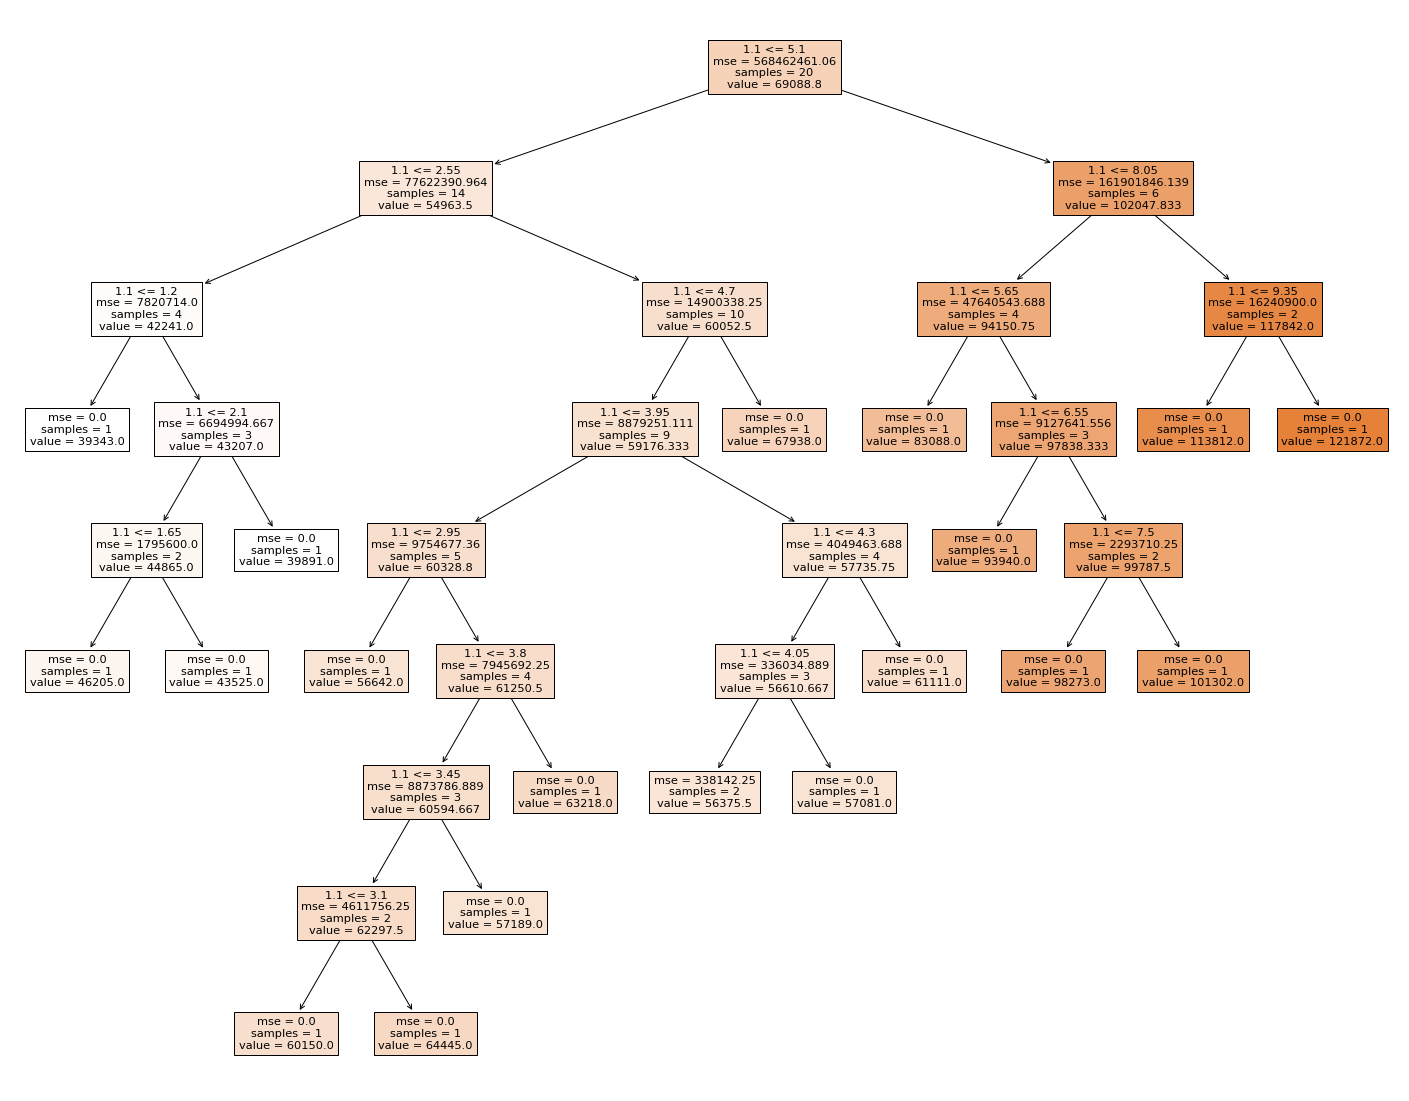

In [28]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)